In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
from qutip import *
from IPython.display import Image


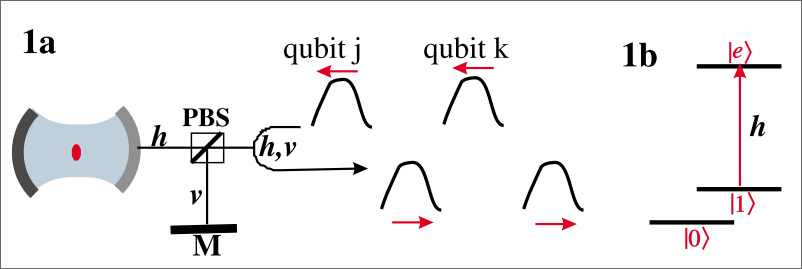

In [3]:
Image("pictures/setup.png")

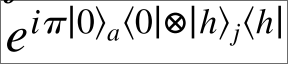

In [4]:
Image("pictures/cpf_gate.png")

In [5]:
cpf = Qobj([[-1,0,0,0],[0,1,0,0],[0,0,1,0],[0,0,0,1]])
cpf

Quantum object: dims=[[4], [4]], shape=(4, 4), type='oper', dtype=Dense, isherm=True
Qobj data =
[[-1.  0.  0.  0.]
 [ 0.  1.  0.  0.]
 [ 0.  0.  1.  0.]
 [ 0.  0.  0.  1.]]

In [6]:
# Define constants
g = 1.0           # Atom-cavity coupling strength
kappa = 1.0       # Cavity decay rate
gamma = 0.5       # Atomic spontaneous emission rate
T = 10            # Pulse duration
n_photon = 2      # Photon number states: 0 or 1
n_atom = 3        # Atom: |0>, |1>, |e>

# Basis states
# Atom: |0>, |1>, |e> → index 0, 1, 2
# Photon: |h>, |v> → index 0, 1

# Time list
tlist = np.linspace(0, T, 500)

In [7]:
def input_shape(x:float) -> float:
    return np.exp(-(x-T/2)**2/(T/5)**2)

In [8]:
dim = [3,2]
U = qeye([3, 2])
U_cpf = U.full()
U_cpf[0, 0] = -1
cpf_system = Qobj(U_cpf, dims=[dim, dim])
cpf_system

Quantum object: dims=[[3, 2], [3, 2]], shape=(6, 6), type='oper', dtype=Dense, isherm=True
Qobj data =
[[-1.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.]
 [ 0.  0.  1.  0.  0.  0.]
 [ 0.  0.  0.  1.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.]
 [ 0.  0.  0.  0.  0.  1.]]

In [9]:
# Identity operators
I_atom = qeye(n_atom)
I_photon = qeye(n_photon)

In [10]:
# Light operators
a_h = tensor(I_atom,destroy(n_photon))
a_h_dag = a_h.dag()

In [16]:
# Atom Operators
sm = tensor(basis(n_atom,2) * basis(n_atom,1).dag(),I_photon)
sm_dag = sm.dag()

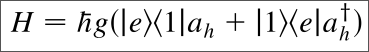

In [17]:
Image("pictures/cpf_gate_hamiltonian.png")

In [18]:
H_jc = g*(sm*a_h + sm_dag*a_h_dag)

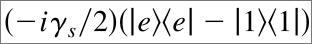

In [19]:
Image("pictures/spont_emission_noise.png")

In [20]:
# Collapse operators
'''c_ops = [
    np.sqrt(kappa) * tensor(I_atom, a),             # Cavity decay
    np.sqrt(gamma) * tensor(basis(n_atom, 0) * basis(n_atom, 2).dag(), I_cavity),  # |e> → |0>
    np.sqrt(gamma) * tensor(basis(n_atom, 1) * basis(n_atom, 2).dag(), I_cavity),  # |e> → |1>
]'''
c_ops = [
    (gamma/2j) * tensor(basis(n_atom,2)*basis(n_atom,2).dag() - basis(n_atom,1)*basis(n_atom,1).dag())
]

In [22]:
# Atom initial state: (|0> + |1>) / sqrt(2)
psi_atom = (basis(n_atom, 0) + basis(n_atom, 1)).unit()

psi_cavity = basis(n_photon, 0)

# Full initial state
psi0 = tensor(psi_atom,psi_cavity)
psi0
cpf_system*psi0

#psi0 = tensor(basis(n_atom,0),psi_cavity)

Quantum object: dims=[[3, 2], [1, 1]], shape=(6, 1), type='ket', dtype=Dense
Qobj data =
[[-0.70710678]
 [ 0.        ]
 [ 0.70710678]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]]

# pulse_scale = 1  # small enough so that max photons in cavity ≈ 1
H_drive = [pulse_scale * a_h_dag, input_shape]

In [157]:
# Evolve

H = [H_jc, H_drive]

#H = [H_jc]

#result = mesolve(H, psi0, tlist,c_ops,[])
result = mesolve(H, psi0, tlist,[])

In [158]:
result.states[-1]

Quantum object: dims=[[3, 2], [1, 1]], shape=(6, 1), type='ket', dtype=Dense
Qobj data =
[[0.19404501+0.j        ]
 [0.        -0.68759188j]
 [0.19404501+0.j        ]
 [0.        -0.07173814j]
 [0.24250866+0.j        ]
 [0.        +0.62285927j]]